In [ ]:
%matplotlib inline
from fastai.basics import *
from fastai.tabular import*

In [ ]:
path=Path("/content/data")
path

PosixPath('/content/data')

In [ ]:
data=pd.read_csv(path/"Discovering the Stability Formula.csv", header=None, index_col=False)
data.head()

,0,1
0,1,1
1,1,2
2,2,3
3,2,4
4,3,6


In [ ]:
len(data)

282

In [ ]:
x=[]

In [ ]:
y=[]

In [ ]:
for i in range(len(data)):
  x_val = data[0][i]
  y_val = data[1][i]
  x.append([float(x_val**2), float(x_val), float(1)])
  y.append(y_val-x_val)

In [ ]:
x[-5:], y[-5:]

([[6561.0, 81.0, 1.0],
  [6724.0, 82.0, 1.0],
  [6724.0, 82.0, 1.0],
  [6724.0, 82.0, 1.0],
  [6724.0, 82.0, 1.0]],
 [124, 122, 124, 125, 126])

In [ ]:
x=tensor(x)
y=tensor(y)

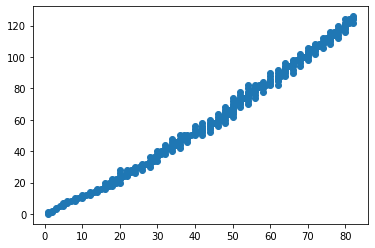

In [ ]:
plt.scatter(x[:,1],y)

In [ ]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [ ]:
a = tensor(1., 1, 1)

In [ ]:
y_hat = x@a
mse(y_hat, y)

tensor(10602186.)

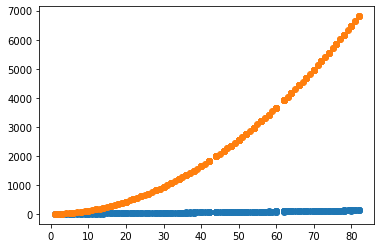

In [ ]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],y_hat);

In [ ]:
a = nn.Parameter(a); a

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)

In [ ]:
def update():
    y_hat = x@a
    loss = mse(y_hat, y)
    if t % 10000 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

Learned till I couldn't anymore

In [ ]:
lr = 1e-9
for t in range(100000): update()

tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)


KeyboardInterrupt: ignored

In [ ]:
a_dup = [a[0], a[1], a[2]]; a_dup

[tensor(0.0059, grad_fn=<SelectBackward>),
 tensor(1.0321, grad_fn=<SelectBackward>),
 tensor(0.9998, grad_fn=<SelectBackward>)]

It looks to be about $0.006n^2+1.03n+1$

In [ ]:
fin_a=tensor([0.0059, 1.0321, 0.9998]); fin_a

tensor([0.0059, 1.0321, 0.9998])

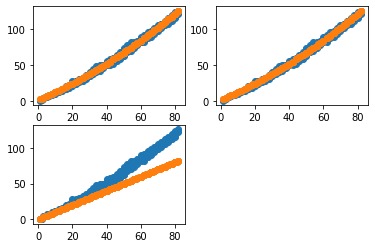

In [ ]:
plt.subplot(2, 2, 1)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],x@tensor(0.006, 1.03, 1).detach())
plt.subplot(2, 2, 2)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],x@fin_a.detach())
plt.subplot(2, 2, 3)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], x[:,1])